In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [15, 10]
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
print("Setup Complete")

Setup Complete


## Problem 1.a)

On the __madelon__ dataset, train decision trees of maximum depth 1, 2, .... up to
12, for a total of 12 decision trees. If your package does not allow the max depth
as a parameter, train trees with $2^1, 2^2, ..., 2^{12}$ nodes, again a total of 12 trees. Use
the trained trees to predict the class labels on the training and test sets, and obtain
the training and test misclassification errors. Plot on the same graph the training
and test misclassification errors vs tree depth (or $\log{2}$ of nodes) as two separate
curves. Report in a table the minimum test error and the tree depth (number of
nodes or splits) for which the minimum was attained.

In [8]:
x = pd.read_csv ("C:/Users/.../MADELON/madelon_train.data", delimiter =" ", header=None)
y = pd.read_csv ("C:/Users/.../MADELON/madelon_train.labels", delimiter =" ", header=None)
xt = pd.read_csv ("C:/Users/.../MADELON/madelon_valid.data", delimiter =" ", header=None)
yt = pd.read_csv ("C:/Users/.../MADELON/madelon_valid.labels", delimiter =" ", header=None)
x.drop([500], axis = 1, inplace = True)
xt.drop([500], axis = 1, inplace = True)
#print(x.shape,y.shape,xt.shape,yt.shape)
scores_train = np.empty(0)
scores_test = np.empty(0)
depth_medalon = [1,2,3,4,5,6,7,8,9,10,11,12]
for depth in depth_medalon:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(x, y)

    training_scores = model.score(x, y)
    test_scores = model.score(xt, yt)

    scores_train = np.append(scores_train,(1-training_scores)*100.00)
    scores_test = np.append(scores_test,(1-test_scores)*100.00)

print(scores_test)

[38.83333333 33.5        28.5        25.16666667 20.5        20.5
 21.5        22.         23.83333333 23.16666667 24.33333333 25.5       ]


(0.5, 1.0, 'Madelon Classification Errors - Q.1a')

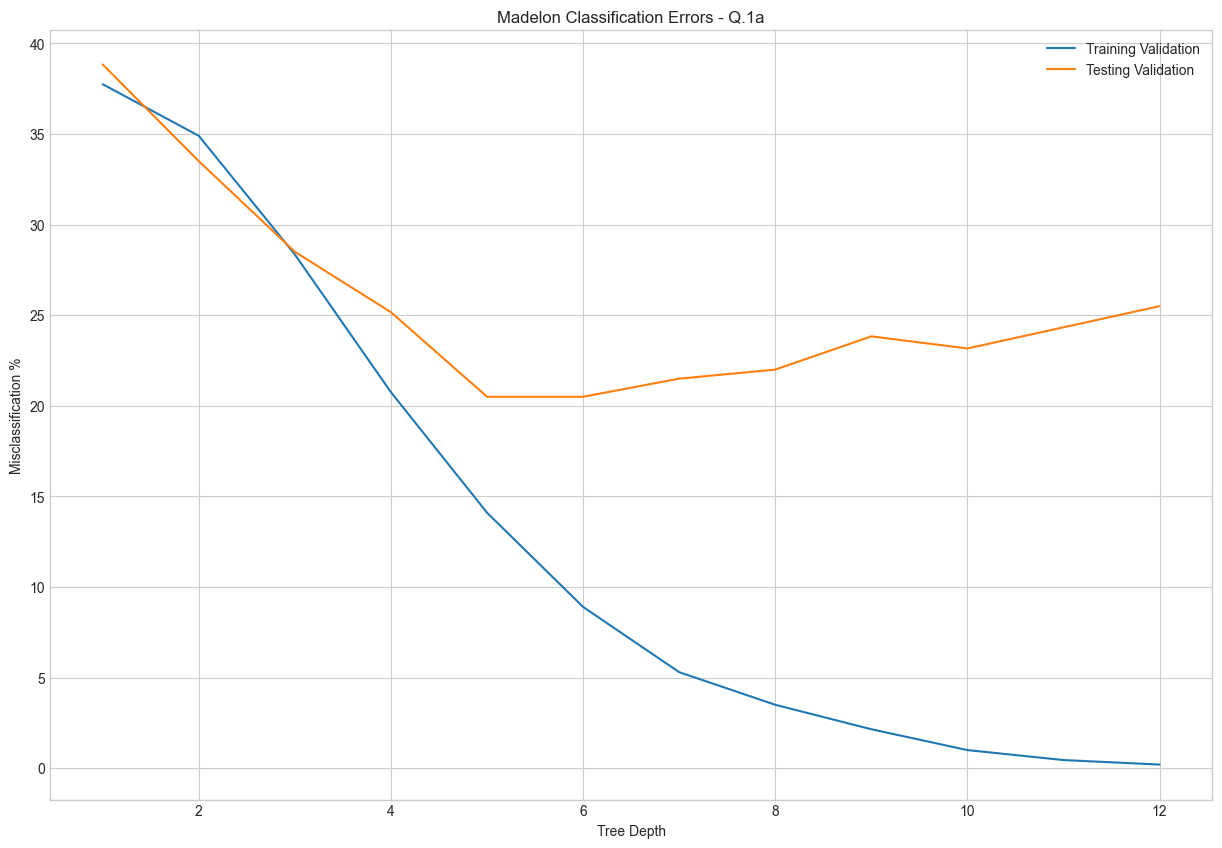

In [11]:
graph1 = plt.figure()
plt.plot(depth_medalon, scores_train, label='Training Validation')
plt.plot(depth_medalon, scores_test, label='Testing Validation')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification %')
plt.legend()
plt.title('Madelon Classification Errors - Q.1a')
(0.5, 1.0, 'Madelon Classification Errors - Q.1a')

In [12]:
min_depth = np.argmin(scores_test)
table = [['Database','Depth','Test Classification Error'],['Madelon',min_depth+1,scores_test[min_depth]]]
print(tabulate(table,headers = 'firstrow',tablefmt = 'fancy_grid'))

╒════════════╤═════════╤═════════════════════════════╕
│ Database   │   Depth │   Test Classification Error │
╞════════════╪═════════╪═════════════════════════════╡
│ Madelon    │       5 │                        20.5 │
╘════════════╧═════════╧═════════════════════════════╛


## Problem 1.b)

Repeat point 1.a) on the __wilt__ dataset, with maximum tree depths _d_ from 1 to 10 --nodes $2^1, ..., 2^{10}$.

In [13]:
xt_2 = pd.read_csv ("C:/Users/.../wilt/wilt_test.csv", delimiter =",", header=None)
yt_2 = pd.read_csv ("C:/Users/.../wilt/wilt_test.labels", delimiter =" ", header=None)
x_2 = pd.read_csv ("C:/Users/.../wilt/wilt_train.csv", delimiter =",", header=None)
y_2 = pd.read_csv ("C:/Users/.../wilt/wilt_train.labels", delimiter =" ", header=None)
#print(x_2.shape,y_2.shape,xt_2.shape,yt_2.shape)
scores_train_w = np.empty(0)
scores_test_w = np.empty(0)
depth_wilt = [1,2,3,4,5,6,7,8,9,10]
for depth in depth_wilt:
    wilt_model = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    wilt_model.fit(x_2, y_2)

    training_scores_w = wilt_model.score(x_2, y_2)
    test_scores_w = wilt_model.score(xt_2, yt_2)

    scores_train_w = np.append(scores_train_w,(1-training_scores_w)*100.00)
    scores_test_w = np.append(scores_test_w,(1-test_scores_w)*100.00)

print(scores_test_w)

[37.4 24.8 23.2 20.8 19.2 18.6 18.8 19.4 19.4 19.4]


(0.5, 1.0, 'Wilt Classification Errors - Q.1b')

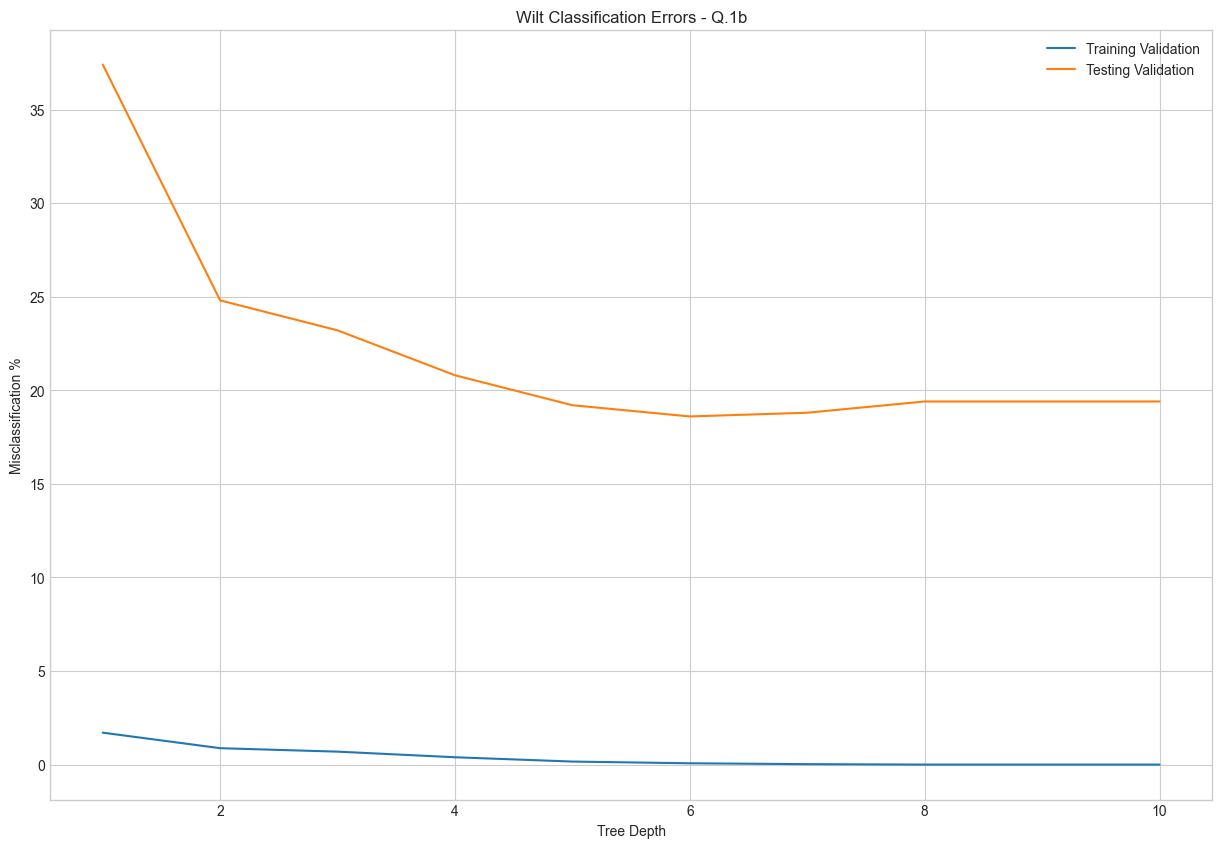

In [14]:
graph2 = plt.figure()
plt.plot(depth_wilt, scores_train_w, label='Training Validation')
plt.plot(depth_wilt, scores_test_w, label='Testing Validation')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification %')
plt.legend()
plt.title('Wilt Classification Errors - Q.1b')
(0.5, 1.0, 'Wilt Classification Errors - Q.1b')

In [15]:
min_depth_w = np.argmin(scores_test_w)
table = [['Database','Depth','Test Classification Error'],['Wilt',min_depth_w+1,scores_test_w[min_depth_w]]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒════════════╤═════════╤═════════════════════════════╕
│ Database   │   Depth │   Test Classification Error │
╞════════════╪═════════╪═════════════════════════════╡
│ Wilt       │       6 │                        18.6 │
╘════════════╧═════════╧═════════════════════════════╛


## Problem 1.c)

On the __madelon__ dataset, for each of _k_ $\in$ {3, 10, 30, 100, 300} train a random
forest with _k_ trees where the split attribute at each node is chosen from a random
subset of $\backsim \sqrt{500} $ features. Use the trained trees to predict the class labels on
the training and test sets, and obtain the training and test misclassification errors.
Plot on the same graph the training and test errors vs number of trees _k_ as two
separate curves. Report the training and test misclassification errors in a table.

In [16]:
from sklearn.ensemble import RandomForestClassifier
#print("Setup Complete")
scores_train_sqrt = np.empty(0)
scores_test_sqrt = np.empty(0)
kvalues = [3,10,30,100,300]
y_train = np.ravel(y)
for k in kvalues:
    k_model = RandomForestClassifier(n_estimators=k, random_state=0, max_features='sqrt')
    k_model.fit(x, y_train)
    
    training_scores_sqrt = k_model.score(x, y_train)
    test_scores_sqrt = k_model.score(xt, yt)
    
    scores_train_sqrt = np.append(scores_train_sqrt,(1-training_scores_sqrt)*100.00)
    scores_test_sqrt = np.append(scores_test_sqrt,(1-test_scores_sqrt)*100.00)

print(scores_test_sqrt)

[45.33333333 37.66666667 33.66666667 27.         25.83333333]


(0.5, 1.0, 'Madelon k Classification Errors - Q.1c')

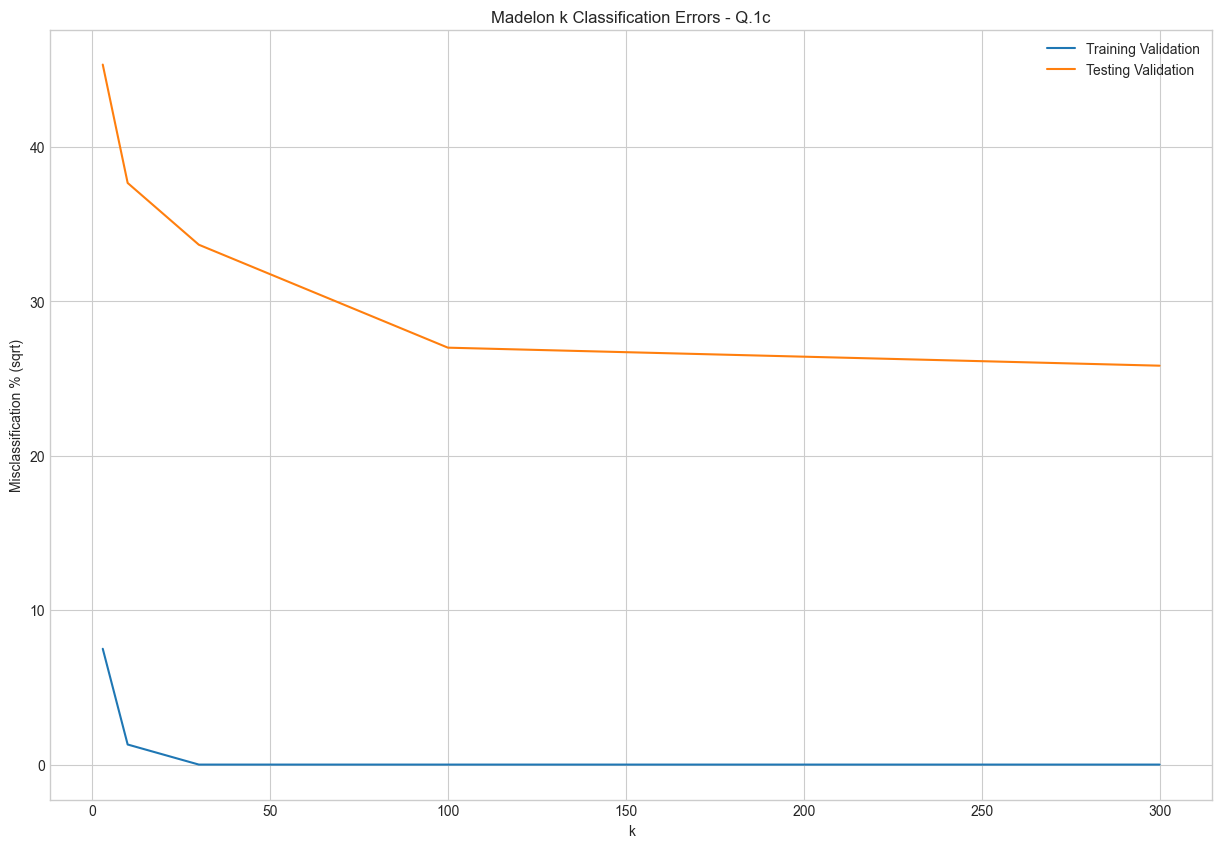

In [18]:
graph3 = plt.figure()
plt.plot(kvalues, scores_train_sqrt, label='Training Validation')
plt.plot(kvalues, scores_test_sqrt, label='Testing Validation')
plt.xlabel('k')
plt.ylabel('Misclassification % (sqrt)')
plt.legend()
plt.title('Madelon k Classification Errors - Q.1c')
(0.5, 1.0, 'Madelon k Classification Errors - Q.1c')

In [19]:
headers =['k','Train Classification Error','Test Classification Error']
table_sqrt = zip(kvalues, scores_train_sqrt, scores_test_sqrt)
print(tabulate(table_sqrt,headers=headers,tablefmt='fancy_grid'))

╒═════╤══════════════════════════════╤═════════════════════════════╕
│   k │   Train Classification Error │   Test Classification Error │
╞═════╪══════════════════════════════╪═════════════════════════════╡
│   3 │                          7.5 │                     45.3333 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│  10 │                          1.3 │                     37.6667 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│  30 │                          0   │                     33.6667 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│ 100 │                          0   │                     27      │
├─────┼──────────────────────────────┼─────────────────────────────┤
│ 300 │                          0   │                     25.8333 │
╘═════╧══════════════════════════════╧═════════════════════════════╛


## Problem 1.d)

Repeat point 1.c) on the __madelon__ dataset where the split attribute at each node is chosen from a random subset of $\backsim \ln{500} $ features.

In [20]:
scores_train_ln = np.empty(0)
scores_test_ln = np.empty(0)
for k in kvalues:
    k_model2 = RandomForestClassifier(n_estimators=k, random_state=0, max_features ='log2')
    k_model2.fit(x, y_train)
    
    training_scores_ln = k_model2.score(x, y_train)
    test_scores_ln = k_model2.score(xt, yt)
    
    scores_train_ln = np.append(scores_train_ln,(1-training_scores_ln)*100.00)
    scores_test_ln = np.append(scores_test_ln,(1-test_scores_ln)*100.00)

print(scores_test_ln)

[48.16666667 44.5        44.         36.33333333 35.16666667]


(0.5, 1.0, 'Madelon k Classification Errors - Q.1d')

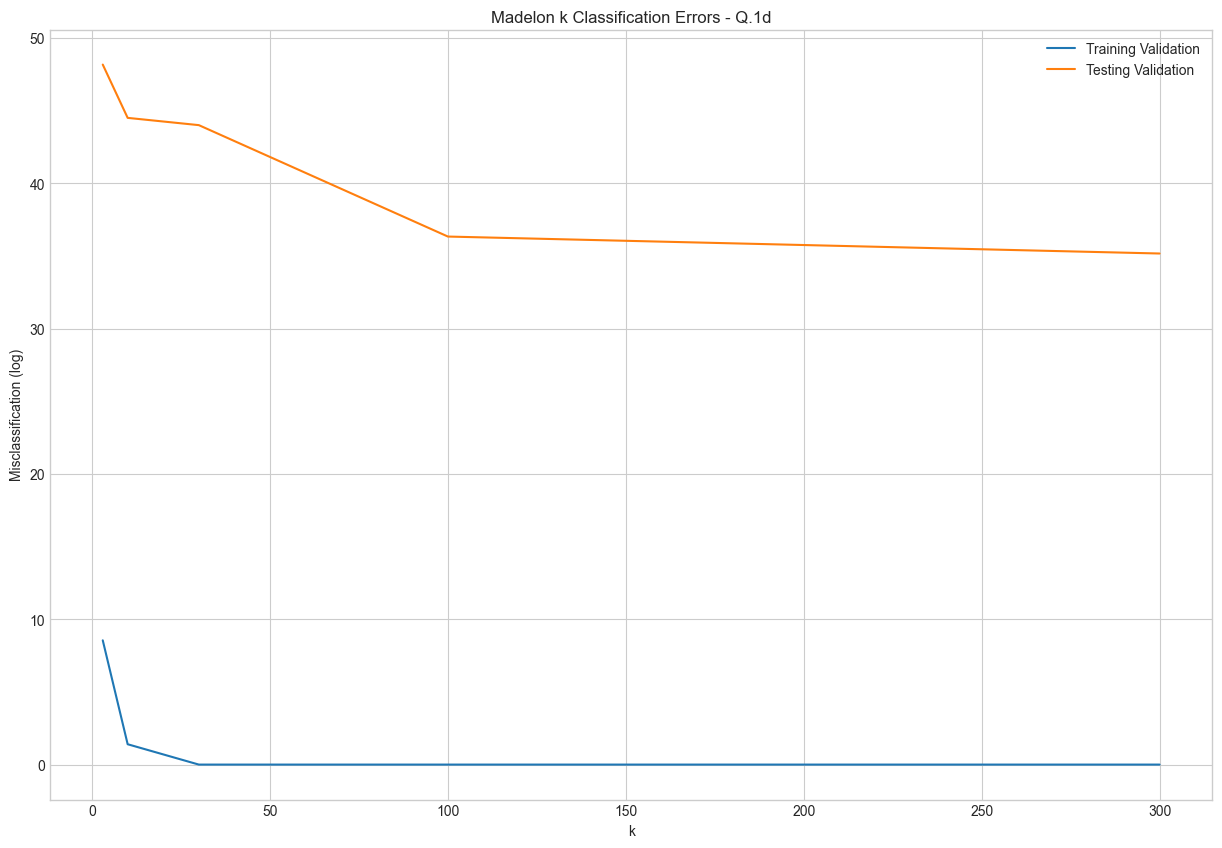

In [22]:
graph4 = plt.figure()
plt.plot(kvalues, scores_train_ln, label='Training Validation')
plt.plot(kvalues, scores_test_ln, label='Testing Validation')
plt.xlabel('k')
plt.ylabel('Misclassification (log)')
plt.legend()
plt.title('Madelon k Classification Errors - Q.1d')
(0.5, 1.0, 'Madelon k Classification Errors - Q.1d')

In [23]:
table_ln = zip(kvalues, scores_train_ln, scores_test_ln)
print(tabulate(table_ln,headers=headers,tablefmt='fancy_grid'))

╒═════╤══════════════════════════════╤═════════════════════════════╕
│   k │   Train Classification Error │   Test Classification Error │
╞═════╪══════════════════════════════╪═════════════════════════════╡
│   3 │                         8.55 │                     48.1667 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│  10 │                         1.4  │                     44.5    │
├─────┼──────────────────────────────┼─────────────────────────────┤
│  30 │                         0    │                     44      │
├─────┼──────────────────────────────┼─────────────────────────────┤
│ 100 │                         0    │                     36.3333 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│ 300 │                         0    │                     35.1667 │
╘═════╧══════════════════════════════╧═════════════════════════════╛


## Problem 1.e)

Repeat point 1.c) on the __madelon__ dataset where the split attribute at each node is chosen from all 500 features.

In [27]:
scores_train_m = np.empty(0)
scores_test_m = np.empty(0)
for k in kvalues:
    k_model3 = RandomForestClassifier(n_estimators=k,random_state=0, max_features=500)
    k_model3.fit(x, y_train)

    training_scores_m = k_model3.score(x, y_train)
    test_scores_m = k_model3.score(xt, yt)
    scores_train_m = np.append(scores_train_m,(1-training_scores_m)*100.00) 
    scores_test_m = np.append(scores_test_m,(1-test_scores_m)*100.00)

print(scores_test_m)

[25.16666667 20.16666667 17.66666667 15.         15.        ]


(0.5, 1.0, 'Madelon k Classification Errors - Q.1e')

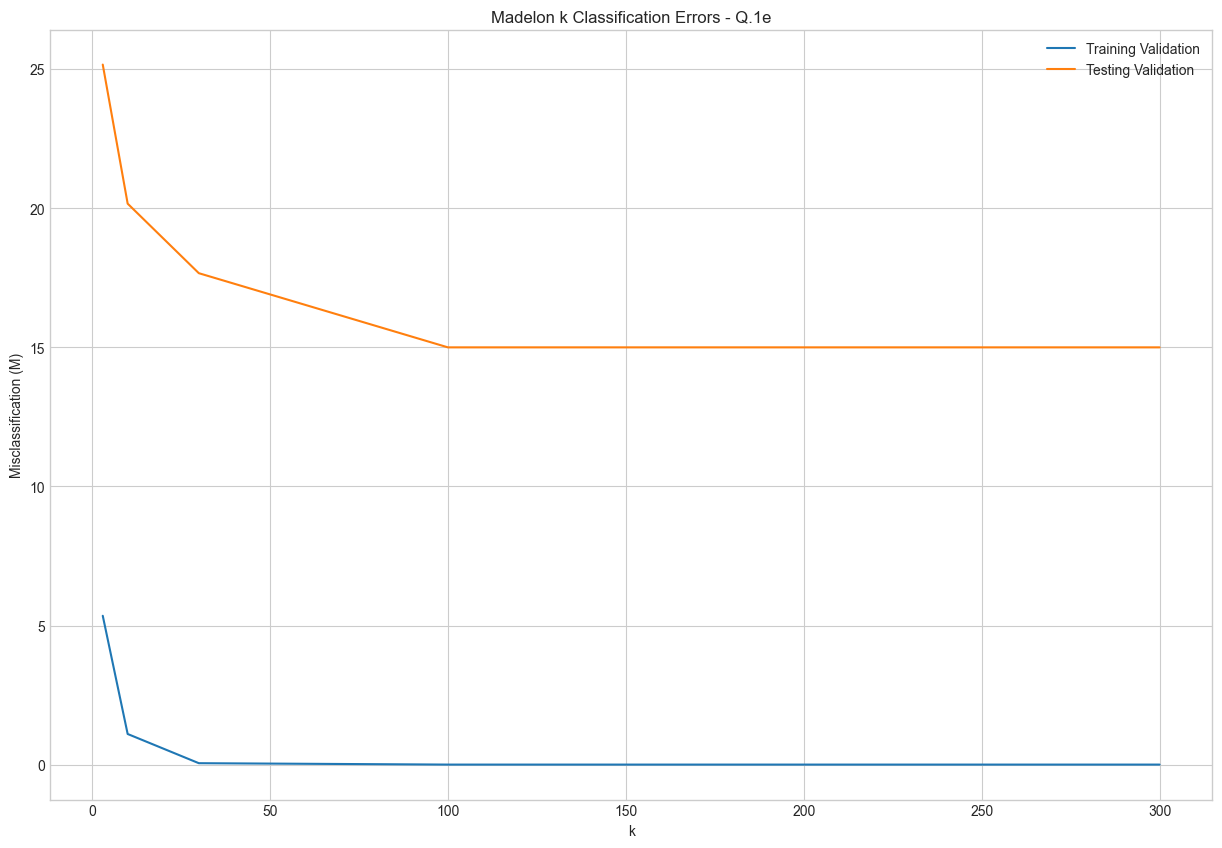

In [29]:
graph5 = plt.figure()
plt.plot(kvalues, scores_train_m, label='Training Validation')
plt.plot(kvalues, scores_test_m, label='Testing Validation')
plt.xlabel('k')
plt.ylabel('Misclassification (M)')
plt.legend()
plt.title('Madelon k Classification Errors - Q.1e')
(0.5, 1.0, 'Madelon k Classification Errors - Q.1e')

In [30]:
table_m = zip(kvalues, scores_train_m, scores_test_m)
print(tabulate(table_m,headers=headers,tablefmt='fancy_grid'))

╒═════╤══════════════════════════════╤═════════════════════════════╕
│   k │   Train Classification Error │   Test Classification Error │
╞═════╪══════════════════════════════╪═════════════════════════════╡
│   3 │                         5.35 │                     25.1667 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│  10 │                         1.1  │                     20.1667 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│  30 │                         0.05 │                     17.6667 │
├─────┼──────────────────────────────┼─────────────────────────────┤
│ 100 │                         0    │                     15      │
├─────┼──────────────────────────────┼─────────────────────────────┤
│ 300 │                         0    │                     15      │
╘═════╧══════════════════════════════╧═════════════════════════════╛
